In [1]:
! pip install qiskit
! pip install pylatexenc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
from qiskit import QuantumRegister, QuantumCircuit, ClassicalRegister
from math import sqrt

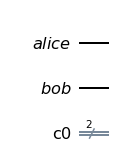

In [3]:
qA = QuantumRegister(1,name = "alice")
qB = QuantumRegister(1,name = "bob")
c = ClassicalRegister(2)
qc = QuantumCircuit(qA,qB,c)
qc.draw("mpl")

Alice and Bob create a maximum entanglement state (arrive at a bell state).

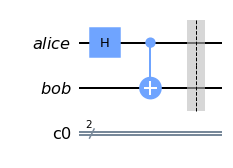

In [4]:
qc.h(qA[0])
qc.cx(qA[0],qB[0])
qc.barrier()
qc.draw("mpl")

Alice will choose between diferent quantum gates to apply on her bell state share depending on the message she wants to send. 

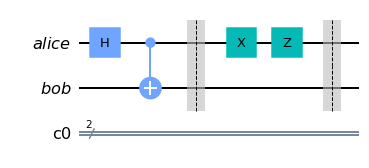

In [5]:
message = "11"
if message == "00":
  qc.i(qA[0])
elif message == "01":
  qc.x(qA[0])
elif message == "10":
  qc.z(qA[0])
else:
  qc.x(qA[0])
  qc.z(qA[0])
qc.barrier()
qc.draw("mpl")

Bob applies the CNOT gate and the hadamard gate

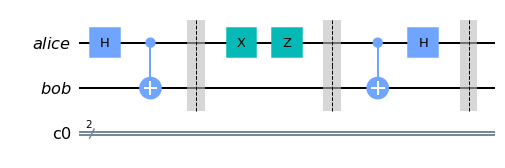

In [6]:
qc.cx(qA[0],qB)
qc.h(qA[0])
qc.barrier()
qc.draw("mpl")

Bob makes the measurement to create retrieve the information:

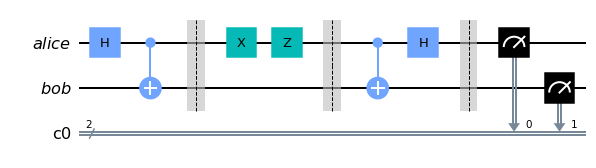

In [7]:
qc.measure(qA[0],c[0])
qc.measure(qB[0],c[1])
qc.draw("mpl")

In [8]:
# simulate in an ideal quantum computer
from qiskit import transpile
from qiskit.providers.aer import QasmSimulator
backend = QasmSimulator()
qc_compiled = transpile(qc,backend)
job = backend.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 1024}


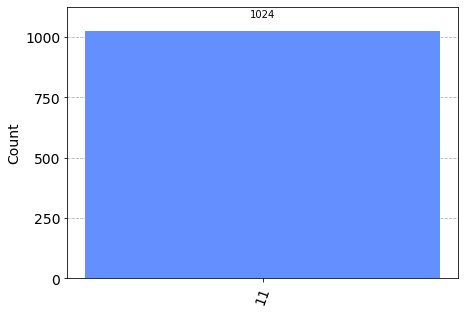

In [9]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [12]:
# simulate in a mock quantum computer
from qiskit.providers.fake_provider import FakeBelem
device_simulator = FakeBelem()

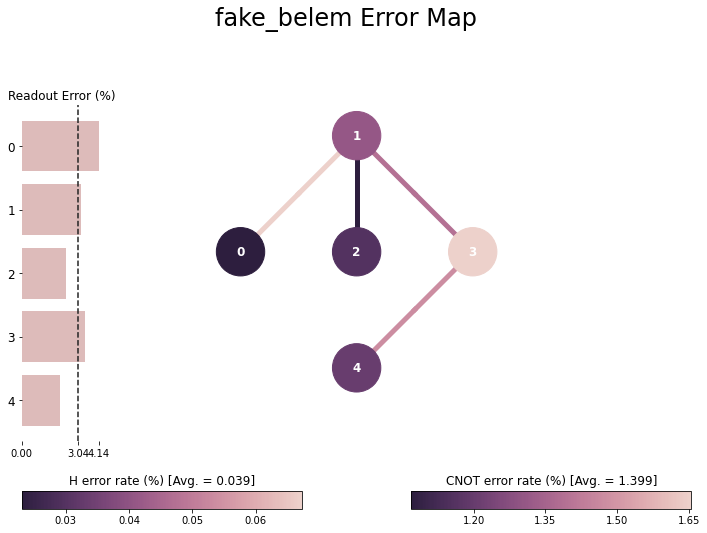

In [13]:
# error map
from qiskit.visualization import plot_error_map
plot_error_map(device_simulator)

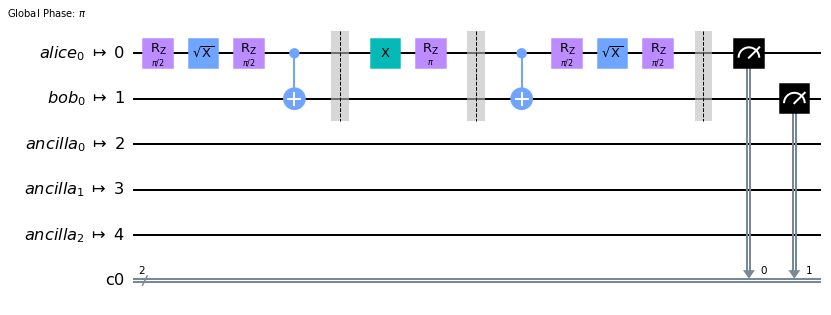

In [14]:
# transpile the quantum circuit with the mock computer's topology
qc_compiled = transpile(qc,device_simulator)
qc_compiled.draw("mpl")

In [15]:
job = device_simulator.run(qc_compiled,shots = 1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'10': 60, '00': 12, '11': 892, '01': 60}


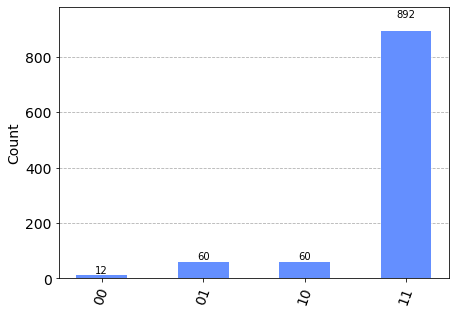

In [16]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)